In [2]:
#Import all libraries
import numpy as np 
import pandas as pd 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

In [3]:
#Read and load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
#Check index of dataframe
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.shape

(1460, 81)

In [6]:
#Info on our target variable
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

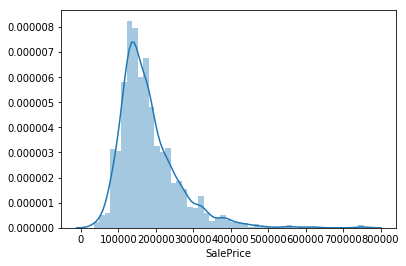

In [7]:
#Plot Histogram for 'SalePrice'
sns.distplot(train['SalePrice'])

In [8]:
#Skewness and Kurtosis - Before log-transformation
print("Skewness : %f" % train['SalePrice'].skew())
print("Kurtosis : %f" % train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


In [9]:
#Skewness and Kurtosis - After log-transformation
target = np.log(train.SalePrice)
print("Skewness : %f" % target.skew())
print("Kurtosis : %f" % target.kurt())

Skewness : 0.121335
Kurtosis : 0.809532


In [10]:
#Displaying of all numerical features
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [11]:
#Finding the correlations of in numeric features
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


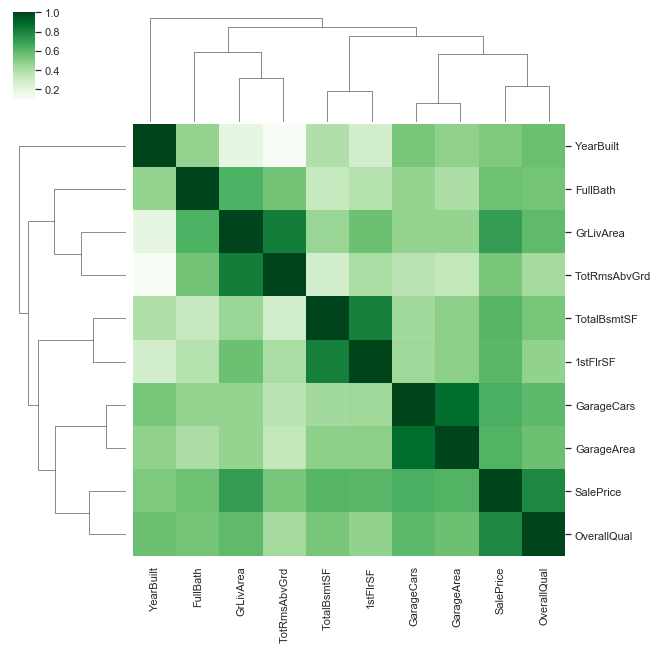

In [12]:
#'SalePrice' Correlation Matrix
k = 10
cols = corr.nlargest(k , 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale = 1.00)
hm = sns.clustermap(cm , cmap = "Greens",cbar = True,square = True,
                 yticklabels = cols.values, xticklabels = cols.values)

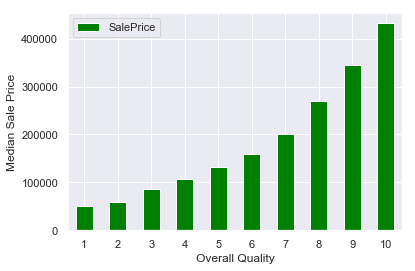

In [13]:
#Compare 'SalePrice' and Overall Quality
quality_pivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
quality_pivot.plot(kind='bar', color='green')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

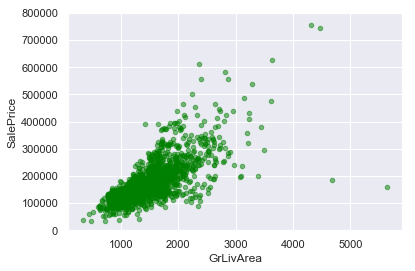

In [14]:
#Analyse SalePrice/GrLiveArea
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

In [15]:
#As we can see in the previous chart there are a few outliers that needs to be taken care of
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice']< 4000000)].index)

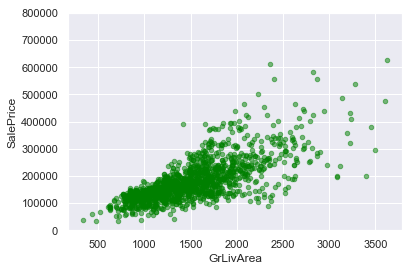

In [16]:
#Analyse SalePrice/GrLiveArea - After outliers were removed as mentioned in documentation
data = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data.plot.scatter(x ='GrLivArea', y= 'SalePrice', ylim = (0,800000), c= 'green', alpha = 0.5)

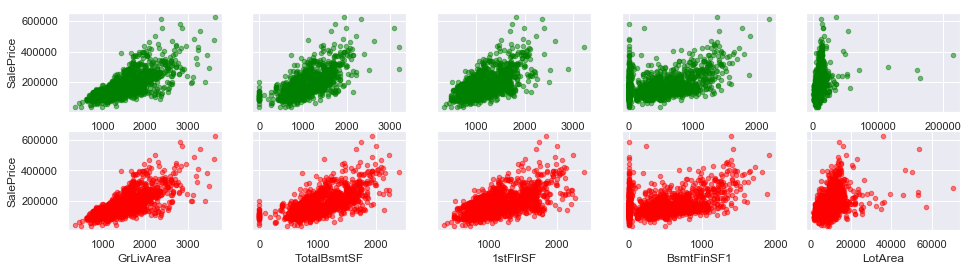

In [17]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(16, 4))
axes = np.ravel(axes)
col_name = ['GrLivArea','TotalBsmtSF','1stFlrSF','BsmtFinSF1','LotArea']
for i, c in zip(range(5), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='green', alpha = 0.5)

# delete outliers
train = train[train['GrLivArea'] < 4000]
train = train[train['LotArea'] < 100000]
train = train[train['TotalBsmtSF'] < 3000]
train = train[train['1stFlrSF'] < 2500]
train = train[train['BsmtFinSF1'] < 2000]

    
for i, c in zip(range(5,10), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='SalePrice', sharey=True, colorbar=False, color='red', alpha = 0.5)

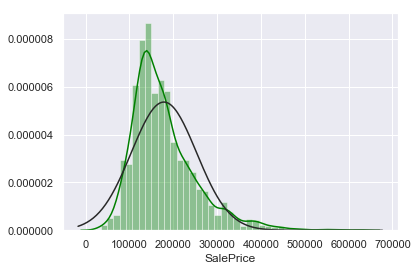

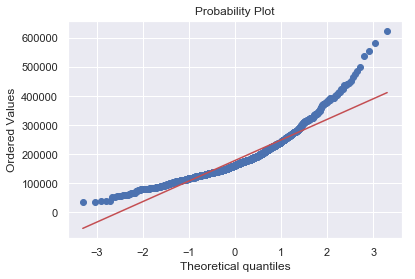

In [18]:
#Histogram and normal probability plot - As we see the data is skewed and does not fit a normal
#distibution - The QQ plot confirms this.
sns.distplot(train['SalePrice'], fit = norm, color='green')
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)

In [19]:
#Log transforming 'SalePrice' to have data less skewed
train['SalePrice'] = np.log1p(train['SalePrice'])

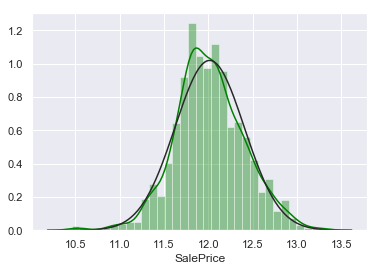

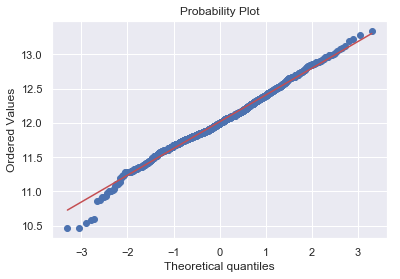

In [20]:
#AFTER -Histogram and normal probability plot - As we see the data now fits a normal distribution better
#The QQ plot confirms this.
sns.distplot(train['SalePrice'], fit = norm, color = 'green')
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot = plt)

In [21]:
#We need to take care of missing data to have a better model fit
#The dataframe below lists the categories that have the most to least missing data
total = train.isnull().sum().sort_values(ascending = False)

percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)

missing_data = pd.concat([total,percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1439,0.996537
MiscFeature,1392,0.963989
Alley,1353,0.936981
Fence,1165,0.806787
FireplaceQu,690,0.477839
LotFrontage,252,0.174515
GarageCond,81,0.056094
GarageType,81,0.056094
GarageYrBlt,81,0.056094
GarageFinish,81,0.056094


In [22]:
#View of categorical variables - Non-numeric by nature
#View some interesting data about each
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1444,1444,91,1444,1444,1444,1444,1444,1444,1444,...,1363,1363,1363,1363,1444,5,279,52,1444,1444
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1135,1439,50,922,1301,1443,1044,1370,225,1247,...,855,604,1295,1310,1324,2,155,47,1255,1188


In [23]:
#Same process as above but on the test set
cate = test.select_dtypes(exclude=[np.number])
cate.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,...,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,...,853,625,1293,1328,1301,2,172,46,1258,1204


In [24]:
for c in categoricals.columns:
    print('{:<14}'.format(c), train[c].unique())

MSZoning       ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street         ['Pave' 'Grvl']
Alley          [nan 'Grvl' 'Pave']
LotShape       ['Reg' 'IR1' 'IR2' 'IR3']
LandContour    ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities      ['AllPub' 'NoSeWa']
LotConfig      ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope      ['Gtl' 'Mod' 'Sev']
Neighborhood   ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1     ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2     ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']
BldgType       ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle     ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle      ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl       ['CompShg' 'WdShngl' 'Metal' 'Wd

In [25]:
#Feature Engineering
#Here we are using label encoding. 
#Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

columns = ('MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition')

# 'BsmtQual', 'GarageCond','ExterCond', 'SaleCondition','GarageFinish','PavedDrive', 'Street', 'OverallCond', 'YrSold', 'KitchenQual'

#Process columns, apply LabelEncoder to categorical features
for i in columns:
    lbl = LabelEncoder() 
    lbl.fit(list(train[i].values)) 
    train[i] = lbl.transform(list(train[i].values))
    lbl.fit(list(test[i].values)) 
    test[i] = lbl.transform(list(test[i].values))

In [26]:
# Deleting dominating features over 97%
train=train.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'])
test=test.drop(columns=['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC'])

In [27]:
# Remove any columns with more than 70% missing values in either the training or testing set.

train = train.dropna(thresh=0.70*len(train), axis=1)
test = test.dropna(thresh=0.70*len(test), axis=1)

In [28]:
#We have to remove any missing data to make our model more robust - free from errors in the modelling phase
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [29]:
#Setting up x and y variables  - ready for modelling
y = train.SalePrice
X = data.drop(['SalePrice', 'Id'], axis=1)

In [30]:
#Firstly setting up of our train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =1)

### Linear Regression

In [31]:
#Linear Regression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Create linear regression 
lm = linear_model.LinearRegression()

#Train the model using the training sets
lm.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lm.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression is 0.9107009439162502
RMSE is:  0.013041771943923437


In [32]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = lm.predict(feats)

lm_predictions = np.exp(predictions)

In [33]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", lm_predictions[:5])

submission['SalePrice'] = lm_predictions
submission.head()

submission.to_csv('Linear Regression.csv', index=False)

Original predictions are: 
 [11.69858722 11.96874007 12.08159589 12.17815694 12.12855545] 

Final predictions are: 
 [120401.4939401  157745.78681846 176591.75779863 194494.06680917
 185082.22272432]


### Lasso Regression

In [34]:
lambda_values = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 100]

In [35]:
from sklearn.linear_model import Lasso

def train_lasso(X, Y, alpha):
    lasso = Lasso(alpha=alpha, max_iter=1000)
    lasso = lasso.fit(X, Y)
    return lasso

In [36]:
lasso_models = []

for alpha in lambda_values:
    l = train_lasso(X_train, y_train, alpha)
    lasso_models.append(l)
    
for i, alpha in enumerate(lambda_values):
    print('Lambda value: ',alpha)
    y_pred_lasso = lasso_models[i].predict(X_test)
    print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred_lasso))
    print ('RMSE is: ', mean_squared_error(y_test, y_pred_lasso))
    print('\n')

Lambda value:  0.0001
The accuracy of the Linear Regression is 0.9110877816435831
RMSE is:  0.012985275832537346


Lambda value:  0.001
The accuracy of the Linear Regression is 0.9118794413729147
RMSE is:  0.012869657077984695


Lambda value:  0.01
The accuracy of the Linear Regression is 0.8996232224334989
RMSE is:  0.014659629103587582


Lambda value:  0.05
The accuracy of the Linear Regression is 0.8289013285168761
RMSE is:  0.0249882804057684


Lambda value:  0.1
The accuracy of the Linear Regression is 0.8155519295104383
RMSE is:  0.02693790703191235


Lambda value:  0.3
The accuracy of the Linear Regression is 0.8148297987363204
RMSE is:  0.027043371359115317


Lambda value:  1
The accuracy of the Linear Regression is 0.8053283208096567
RMSE is:  0.028431024417100124


Lambda value:  3
The accuracy of the Linear Regression is 0.738818548942945
RMSE is:  0.03814451204808389


Lambda value:  5
The accuracy of the Linear Regression is 0.7339301537936552
RMSE is:  0.03885844271549237

In [37]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [38]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [39]:
lasso_predictions = lasso_models[1].predict(feats)
final_lasso = np.exp(lasso_predictions)

In [40]:
print ("Original predictions are: \n", lasso_predictions[:5], "\n")
print ("Final lasso predictions are: \n", final_lasso[:5])

Original predictions are: 
 [11.72641351 11.92938345 12.08937459 12.18770295 12.13012018] 

Final lasso predictions are: 
 [123798.86963283 151658.02875354 177970.7669207  196359.59915206
 185372.05252223]


In [41]:
submission['SalePrice'] = final_lasso
submission.head()

,Id,SalePrice
0,1461,123798.869633
1,1462,151658.028754
2,1463,177970.766921
3,1464,196359.599152
4,1465,185372.052522


In [42]:
submission.to_csv('lasso.csv', index=False)

### Ridge Regression

In [43]:
#Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Create Ridge regression 
ridge = Ridge()

#Train the model using the training sets
ridge.fit(X_train, y_train)
b = float(ridge.intercept_)
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])
print("Intercept:", float(b))

# Make predictions using the testing set - Ridge Regression
test_ridge = ridge.predict(X_test)
print('The accuracy of the Ridge Regression is', r2_score(y_test, test_ridge))
print ('RMSE is: ', mean_squared_error(y_test, test_ridge))

Intercept: 18.578292597179246
The accuracy of the Ridge Regression is 0.9108474121740139
RMSE is:  0.013020380837471137


In [44]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [45]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [46]:
predictions = ridge.predict(feats)
final_ridge = np.exp(predictions)

In [47]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_ridge[:5])

Original predictions are: 
 [11.69914928 11.96762698 12.08194944 12.17850182 12.12828845] 

Final predictions are: 
 [120469.18608756 157570.29875679 176654.20290739 194561.1551674
 185032.8116508 ]


In [48]:
submission['SalePrice'] = final_ridge
submission.head()

,Id,SalePrice
0,1461,120469.186088
1,1462,157570.298757
2,1463,176654.202907
3,1464,194561.155167
4,1465,185032.811651


In [49]:
submission.to_csv('Ridge_Regression.csv', index=False)

### XGBOOST

In [59]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(
                 colsample_bytree=0.5,
                 gamma=0.0,
                 learning_rate=0.05,
                 max_depth=5,
                 min_child_weight=0.5,
                 n_estimators=8000,                                                                  
                 reg_alpha=0.5,
                 reg_lambda=0.5,
                 subsample=0.5,
                 seed=1,
                 silent=1)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
print('The accuracy of the xgboost is',r2_score(y_test,preds))
print ('RMSE is: ', mean_squared_error(y_test,preds))

The accuracy of the xgboost is 0.9147397847190957
RMSE is:  0.012451915309614522


In [56]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = xg_reg.predict(feats)
final_xgboost = np.exp(predictions)

print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_xgboost[:5])

submission['SalePrice'] = final_xgboost
submission.head()

submission.to_csv('XGBoost.csv', index=False)

Original predictions are: 
 [11.720574 11.96755  12.115402 12.157646 12.165776] 

Final predictions are: 
 [123078.1  157558.22 182663.73 190545.48 192100.94]


In [72]:
### Lasso CV test

In [60]:
from sklearn.linear_model import LassoCV

lasso_model = make_pipeline(RobustScaler(),
                             LassoCV()).fit(X_train, y_train)

lasso_preds = lasso_model.predict(X_test)
print('The accuracy of the lasso Regressor is',r2_score(y_test,lasso_preds))
print ('RMSE is: ', mean_squared_error(y_test,lasso_preds))

The accuracy of the lasso Regressor is 0.91016720184282
RMSE is:  0.01311972285072838


In [61]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

#predictions= lasso_model[1].predict(feats)
final_lassoCV = np.exp(lasso_predictions)

#print ("Original predictions are: \n", predictions[:5], "\n")
#print ("Final lasso predictions are: \n", final_lassoCV[:5])

submission['SalePrice'] = final_lassoCV
submission.head()

submission.to_csv('lasso_CV.csv', index=False)

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [64]:
param_grid = {
    'bootstrap': [True],
    'max_depth': range(1,11),
    'max_features': [2,10],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [20, 50]
}

In [65]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [66]:
grid_trained = grid_search.fit(X_train, y_train)

In [67]:
best_grid = grid_trained.best_params_
best_grid

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 100}

In [96]:
def train_rfr(X, Y):
    random_forest = RandomForestRegressor(bootstrap= True, n_estimators=200, max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=10)
    trained_model = random_forest.fit(X, Y)
    return trained_model

In [97]:
random_for_model = train_rfr(X_train, y_train)
y_pred_ran = random_for_model.predict(X_test)
print('The accuracy of the Random Forest Regression is',r2_score(y_test,y_pred_ran))
print ('RMSE is: \n', mean_squared_error(y_test, y_pred_ran))
print('\n')

The accuracy of the Random Forest Regression is 0.8797082693687891
RMSE is: 
 0.01756812878470736




In [71]:
submission = pd.DataFrame()
submission['Id'] = test.Id

feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

predictions = random_for_model.predict(feats)
final_forest = np.exp(predictions)

print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_forest[:5])

submission['SalePrice'] = final_forest
submission.head()

submission.to_csv('RandomForest.csv', index=False)

Original predictions are: 
 [11.71866106 11.91085621 12.1004928  12.12547328 12.16960157] 

Final predictions are: 
 [122842.83561207 148874.09193772 179960.52585102 184512.64563009
 192837.1963832 ]
